<a href="https://colab.research.google.com/github/GuiCoelhoDev/Datascience_Alura3/blob/main/DataScience_3_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
dados = pd.read_csv(url_dados, compression = 'zip')
# removes hyphens from columns
dados.columns = [column.replace('-', '') for column in dados.columns]
mapa= {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados



,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

```markdown

# After investigation:
Shape: (23814, 877)
Número de drogas testadas: 3289
Culturas sob a droga 87d714366: 718
Culturas com_controle sob a droga cacb2b860: 1866



# Desafios
1- Pq existe tanto registro com Droga e pouco com controle? 
# R: Pq tratamento com controle usa a mesma droga
2- Mostrar as 5 últimas linhas da tabela
# R: [dados.tail()]
3- Calcular a proporção das classes tratamento 
# R: test = dados['tratamento'].value_counts(normalize=True)
4- Quantas drogas eles investigaram? Quantos tipos de drogas foram investigados?
# R: 3289
5- Procurar na documentação o método Query, (pandas)
6- renomear colunas tirando o hifen para não bugar
7- Colocar um título no gráfico pizza (matplotlib)
8- Resumo do que aprendeu com os dados

```

# Aula 1



In [126]:

rowsWithControlOnly = dados.loc[dados['tratamento'] == 'com_controle'].head(10)
rowsWithDrugsOnly = dados.loc[dados['tratamento'] == 'com_droga'].head(10)

print(rowsWithDrugsOnly[rowsWithDrugsOnly.columns[0:8]])
print(rowsWithControlOnly[rowsWithControlOnly.columns[0:8]])
print(rowsWithDrugsOnly[['tratamento', 'composto']])
print(rowsWithControlOnly[['tratamento', 'composto']])

# Aparentemente tanto os tratamentos com composto quanto sem influenciam nos genes


             id tratamento  tempo dose   composto      g0      g1      g2
0  id_000644bb2  com_droga     24   D1  b68db1d53  1.0620  0.5577 -0.2479
1  id_000779bfc  com_droga     72   D1  df89a8e5a  0.0743  0.4087  0.2991
2  id_000a6266a  com_droga     48   D1  18bb41b2c  0.6280  0.5817  1.5540
3  id_0015fd391  com_droga     48   D1  8c7f86626 -0.5138 -0.2491 -0.2656
4  id_001626bd3  com_droga     72   D2  7cbed3131 -0.3254 -0.4009  0.9700
5  id_001762a82  com_droga     24   D1  e06749542 -0.6111  0.2941 -0.9901
6  id_001bd861f  com_droga     24   D2  746ca1f5a  2.0440  1.7000 -1.5390
7  id_0020d0484  com_droga     48   D1  8b87a7a83  0.2711  0.5133 -0.1327
8  id_00224bf20  com_droga     48   D1  952b76dfc -0.3014  0.5545 -0.2576
9  id_0023f063e  com_droga     48   D2  de7583071 -0.0630  0.2564 -0.5279
               id    tratamento  tempo dose   composto      g0      g1      g2
25   id_0054388ec  com_controle     48   D1  cacb2b860 -0.6696 -0.2718 -1.2230
38   id_0079af0fb  com_contr

In [127]:
totalOfTreatmentWithDrugs = dados['tratamento'].value_counts()[0];
totalOfTreatmentWithControl = dados['tratamento'].value_counts()[1];
porcentageOfTreatmentWithDrugs = (totalOfTreatmentWithDrugs/(totalOfTreatmentWithControl + totalOfTreatmentWithDrugs)) * 100;
porcentageOfTreatmentWithControl = (totalOfTreatmentWithControl/(totalOfTreatmentWithControl + totalOfTreatmentWithDrugs)) * 100;
normalizedTreatments = dados['tratamento'].value_counts(normalize=True);

print("\nPorcentage of treathment with Drugs: " , porcentageOfTreatmentWithDrugs)
print("Porcentage of treathment with Control: " , porcentageOfTreatmentWithControl)
print("Normalized treatments \n", normalizedTreatments)
 



Porcentage of treathment with Drugs:  92.16427311665407
Porcentage of treathment with Control:  7.835726883345931
Normalized treatments 
 com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64


Quero ver um gráfico com a proporção de tratamentos com droga e sem droga

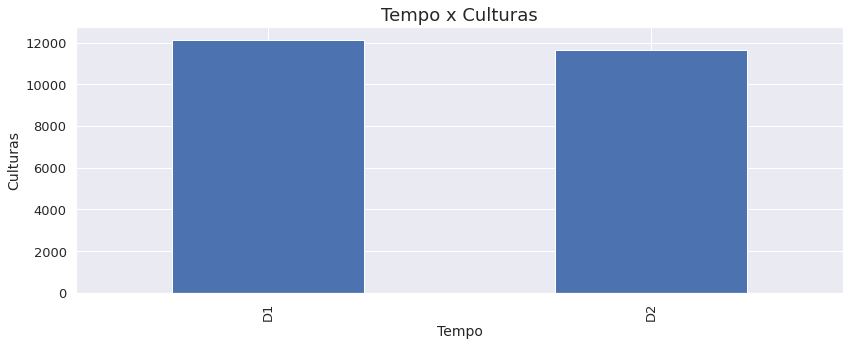

In [128]:
# Deixar o gráfico com um título
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
# dados['tratamento'].value_counts().plot.bar()
# plt.figure(figsize=(8,4), tight_layout=True)

tempos = [24,48];
dados_tempos = dados[dados['tempo'].isin(tempos)]
dados_tempos

plt.figure(figsize=(12, 5), tight_layout=True)
plt.xlabel('Tempo')
plt.ylabel('Culturas')
plt.title('Tempo x Culturas')
dados['dose'].value_counts().plot.bar()


# ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')







Quero ver agora um gráfico da proporção de tipos de drogas para as culturas

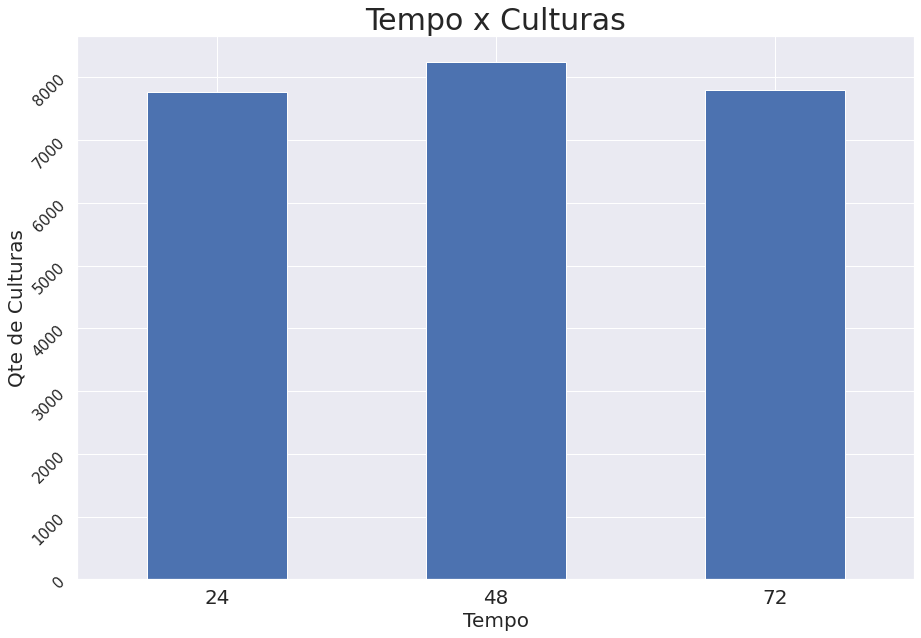

In [129]:

plt.figure(figsize=(15,10)) # cria figura
# pega os valores do eixoX (tempos) para comparar com o total de culturas
xValues = dados['tempo'].value_counts(ascending=True) 
# ordena os tempos para ficar 24,48,72 em vez de 24,72,48
ax = xValues.sort_index().plot.bar()
# adiciona titlo para o gráfico e labels
ax.set_title('Tempo x Culturas', fontsize=30)
ax.set_xlabel('Tempo', fontsize=20)
ax.set_ylabel('Qte de Culturas', fontsize=20)
# rotaciona as labels x e y
plt.xticks(rotation = 0 , fontsize = 20) 
plt.yticks(rotation = 45 , fontsize = 15)
plt.show()


In [131]:
dados.loc[dados['composto'] == 'cacb2b860'].value_counts()


id            tratamento    tempo  dose  composto   g0       g1       g2       g3       g4       g5       g6       g7       g8       g9       g10      g11      g12      g13      g14      g15      g16      g17      g18      g19      g20      g21      g22      g23      g24      g25      g26      g27      g28      g29      g30      g31      g32      g33      g34      g35      g36      g37      g38      g39      g40      g41      g42      g43      g44      g45      g46      g47      g48      g49      g50      g51      g52      g53      g54      g55      g56      g57      g58      g59      g60      g61      g62      g63      g64      g65      g66      g67      g68      g69      g70      g71      g72      g73      g74      g75      g76      g77      g78      g79      g80      g81      g82      g83      g84      g85      g86      g87      g88      g89      g90      g91      g92      g93      g94      g95      g96      g97      g98      g99      g100     g101     g102     g103     g104     g10

Using panda.query instead of panda.loc

In [132]:
dados.query('g0 > 0')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,

# Aula 2

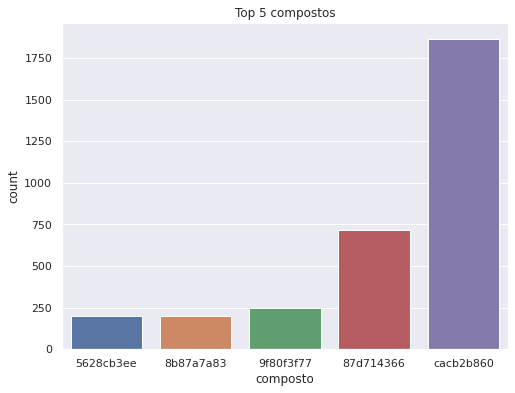

In [133]:
#@title Countplot sorted [Desafio 1 e 2] - Seaborn graphs
'''
 dado minha coluna com os valores de composto, usar value_counts para ver a 
 quantidade de tratamentos que tem determinado composto. Posteriormente, pegar
 os 5 primeiros [0,1,2,3,4] que mais aparecem nos dados.
'''
cod_compostos = dados['composto'].value_counts().index[0:5]

isAscending = True #@param {type:"boolean"}
if(isAscending == True):
    cod_compostos = cod_compostos[::-1]

'''
Posteriormente, fazer uma query
'''
dados.query('composto in @cod_compostos_asc')

sns.set(font_scale=1)
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos_asc'),order = cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()



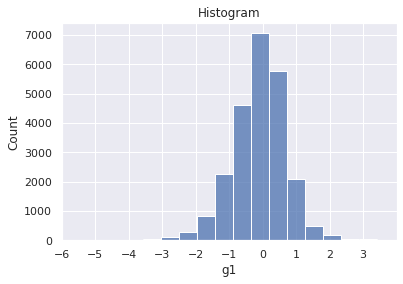

In [156]:
#@title [Desafio 3] - Histograms
sns.set(font_scale=1)
ax = sns.histplot(data=dados, x="g1",bins=20)
ax.set_title("Histogram")
ax.set_xlim(-6,4)
ax.set_xticks(range(-6,4))


In [141]:
#@title [Desafio 4] - Describe()
dados.describe()


,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

        count      mean       std     min       25%      50%       75%     max
g0    23814.0  0.248366  1.393399  -5.513 -0.473075 -0.00885  0.525700  10.000
g1    23814.0 -0.095684  0.812363  -5.737 -0.562200 -0.04660  0.403075   5.039
g2    23814.0  0.152253  1.035731  -9.104 -0.437750  0.07520  0.663925   8.257
g3    23814.0  0.081971  0.950012  -5.998 -0.429575  0.00805  0.463400  10.000
g4    23814.0  0.057347  1.032091  -6.369 -0.470925 -0.02690  0.465375  10.000
...       ...       ...       ...     ...       ...      ...       ...     ...
g767  23814.0 -0.076251  1.115477 -10.000 -0.506200  0.00990  0.511175   6.317
g768  23814.0  0.134162  0.951264  -4.269 -0.353100  0.00540  0.409075  10.000
g769  23814.0 -0.128018  1.230636 -10.000 -0.544600  0.00060  0.498500   5.911
g770  23814.0 -0.219210  1.326193 -10.000 -0.554400  0.02870  0.496400  10.000
g771  23814.0  0.101524  1.417674 -10.000 -0.523800 -0.00650  0.536950  10.000

[772 rows x 8 columns]


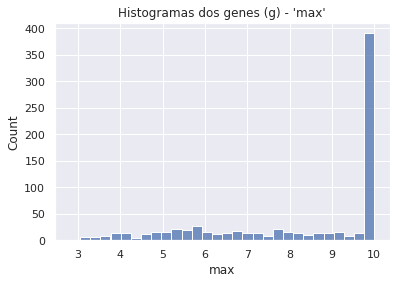

       count      mean       std   min       25%      50%       75%    max
c0   23814.0 -0.355156  1.752565 -10.0 -0.549300 -0.00900  0.448975  3.365
c1   23814.0 -0.455359  2.004962 -10.0 -0.538425  0.00980  0.476875  3.915
c2   23814.0 -0.480542  2.039346 -10.0 -0.550375 -0.00400  0.460575  2.970
c3   23814.0 -0.377666  1.554583 -10.0 -0.601975 -0.03905  0.413100  2.408
c4   23814.0 -0.493552  2.091888 -10.0 -0.559975  0.01140  0.470300  4.555
..       ...       ...       ...   ...       ...      ...       ...    ...
c95  23814.0 -0.353726  1.629291 -10.0 -0.567975 -0.01025  0.444750  2.814
c96  23814.0 -0.463485  2.059725 -10.0 -0.552575 -0.00125  0.465225  3.505
c97  23814.0 -0.378241  1.703615 -10.0 -0.561000 -0.00680  0.446400  2.924
c98  23814.0 -0.470252  1.834828 -10.0 -0.592600  0.01400  0.461275  3.111
c99  23814.0 -0.301505  1.407918 -10.0 -0.562900 -0.01950  0.438650  3.805

[100 rows x 8 columns]


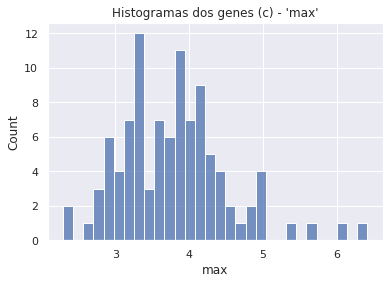

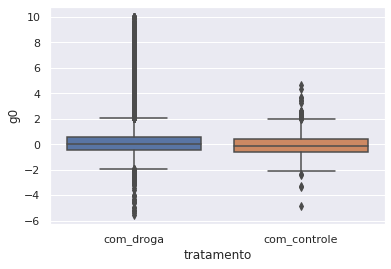

In [201]:
#@title [Desafio 6] - Boxplot and Histogram 

dados_transpostos = dados.loc[:, 'g0': 'g771'].describe().T
dados_transpostos2 = dados.loc[:, 'c0': 'c99'].describe().T
print(dados_transpostos)



stats = "max" #@param ["mean", "max", "min"]

sns.set(font_scale=1)
ax = sns.histplot(data=dados_transpostos, x=stats,bins=30)
ax.set_title("Histogramas dos genes (g) - %a" % stats)

plt.show()

print(dados_transpostos2)

ax_2 = sns.histplot(data=dados_transpostos2, x=stats,bins=30)
ax_2.set_title("Histogramas dos genes (c) - %a" % stats)
plt.show()


sns.boxplot(y='g0', x='tratamento', data=dados)








# Aula 3